# **Crime Records Clustering Analysis**
### This dataset is taken from data.world and stored on Github. In this dataset, we are dealing with categorical values. Here we are going to find out the most dangerous area of Cambridge and common crimes.


**Installing the Libraries**

In [ ]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

**Reading the Dataset**

In [ ]:
# importing the dataset
data = pd.read_csv('https://raw.githubusercontent.com/Rumsha001/ML2/main/dataset/Cambridge%20_Crime_Data.csv')

#Printing first 5 rows
data.head()

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA"
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA"
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg..."
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA"
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA"


In [ ]:
#changing column name
# data.rename(index=str, columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)
# describing the data
print("Total no. of row: ", data.shape[0], "\nTotal no. of columns: ", data.shape[1])
print("---------------------------------------------")
print("No.of missing values in eaach column:")
data.isnull().sum()

Total no. of row:  56014 
Total no. of columns:  7
---------------------------------------------
No.of missing values in eaach column:


File Number         0
Date of Report      0
Crime Date Time     0
Crime               0
Reporting Area      2
Neighborhood        2
Location           83
dtype: int64

In [ ]:
# Removing Null values

data = data.dropna(subset=['Neighborhood', 'Reporting Area', 'Location'])
data['Year'] = data['File Number'].astype(str).str[:4]
data['Crime Date Time'] = data['Crime Date Time'].astype(str).str[0:16]
data1= data.copy(deep=True)
data =  data.drop('File Number', 1)
data.head()

,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location,Year
0,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",2009
1,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",2009
2,01/01/2009 01:43:00 AM,01/01/2009 02:20,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",2009
3,01/01/2009 02:27:00 AM,01/01/2009 02:20,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA",2009
4,01/01/2009 02:34:00 AM,01/01/2009 02:15,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA",2009


In [ ]:
# Converting Date and Time in proper format

data['Crime Date Time'] = pd.to_datetime(data['Crime Date Time'])
data['Date of Report'] = pd.to_datetime(data['Date of Report'])
data.head(2)

,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location,Year
0,2009-01-01 00:39:00,2009-01-01 00:39:00,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",2009
1,2009-01-01 01:34:00,2009-01-01 01:34:00,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",2009


# **Data Visualization**

In [ ]:
def create_list_number_crime(name_column, list_unique):    
    i = 0
    
    list_number = list()
    
    while i < len(list_unique):
        list_number.append(len(data.loc[data[name_column] == list_unique[i]]))
        i += 1
    
    return list_unique, list_number

In [ ]:
def bar_chart(list_number, list_unique):
    objects = list_unique
    y_pos = np.arange(len(objects))
    performance = list_number
 
    plt.figure(figsize=(20,10))    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Number') 
    plt.show()
    
    return 0

## **List of Crimes**

Larceny from MV           4826
Hit and Run               4652
Domestic Dispute          3899
Mal. Dest. Property       3666
Simple Assault            3292
Larceny from Building     2856
Shoplifting               2788
Larceny of Bicycle        2744
Housebreak                2668
Forgery                   2579
Warrant Arrest            2572
Larceny from Person       2274
Larceny from Residence    1739
Aggravated Assault        1726
Threats                   1633
Auto Theft                1101
Missing Person             949
Flim Flam                  936
Harassment                 812
Street Robbery             759
Drugs                      673
Admin Error                659
Accident                   626
Commercial Break           584
Phone Calls                450
OUI                        387
Suspicious Package         381
Violation of R.O.          377
Trespassing                359
Disorderly                 306
Larceny (Misc)             268
Taxi Violation             259
Larceny 

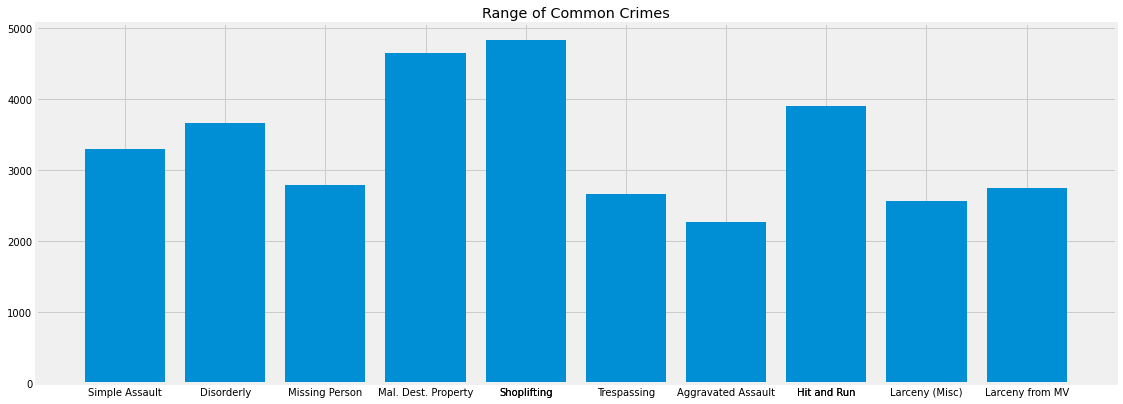

In [ ]:
list_crimes = data['Crime'].value_counts()
print(list_crimes)

crimes = data['Crime'].unique()
crime_count=[]
for i in crimes:
  crime_count.append(len(data[data['Crime'] == i]))

common_crimes=[]
common_crimes_count=[]
i=0
while i<len(crime_count):
  if crime_count[i] >2000:
    common_crimes.append(data['Crime'][i])
    common_crimes_count.append(crime_count[i])
  i=i+1

# print("***",common_crimes)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(common_crimes,common_crimes_count,tick_label=common_crimes)
plt.title('Range of Common Crimes')
plt.show()

## **Crime Rate Each Year**

['2009' '2014' '2010' '2011' '2012' '2013' '2015' '2016'] [7489, 7376, 7505, 7420, 7130, 6952, 7051, 5006]


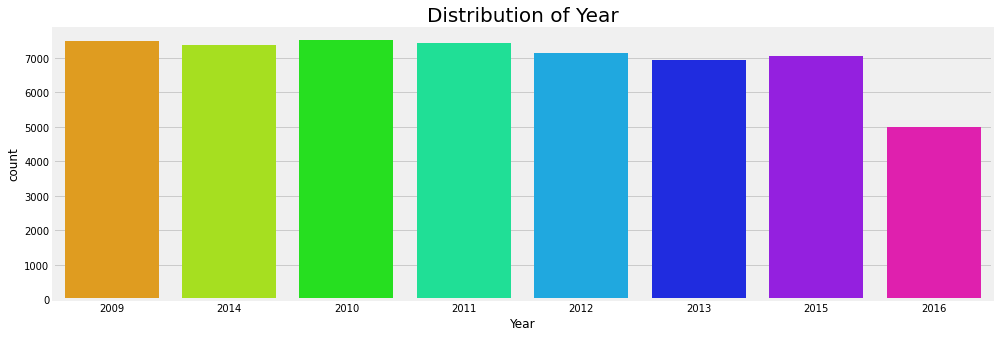

In [ ]:
#Showing Year distribution
list_unique_year, list_number_year = create_list_number_crime('Year',data['Year'].unique())
print(list_unique_year, list_number_year)
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data['Year'], palette = 'hsv')
plt.title('Distribution of Year', fontsize = 20)
plt.show()

## **Crime Rate in Each Neighborhood**

['Cambridgeport' 'Mid-Cambridge' 'Riverside' 'East Cambridge'
 'North Cambridge' 'Area 4' 'Highlands' 'Agassiz' 'West Cambridge'
 'Inman/Harrington' 'Peabody' 'MIT' 'Strawberry Hill'] [7825, 5474, 5249, 7683, 5596, 6016, 1203, 1512, 5541, 4190, 3511, 1092, 1037]


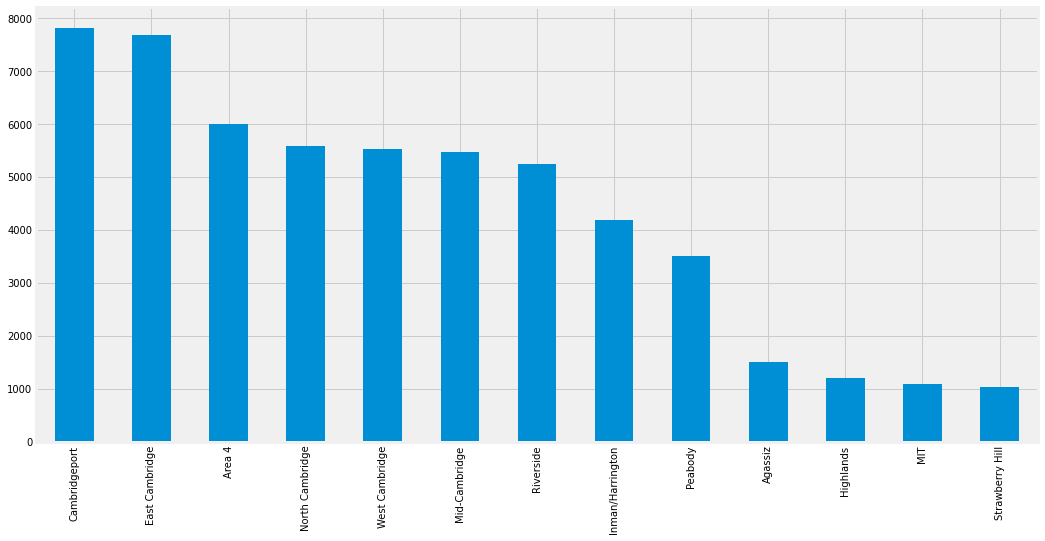

In [ ]:
list_unique_neighborhood, list_number_neighborhood = create_list_number_crime('Neighborhood',data['Neighborhood'].unique())
print(list_unique_neighborhood, list_number_neighborhood)
plt.figure(figsize=(16,8))
data['Neighborhood'].value_counts().plot.bar()
plt.show()

## **Plotting Crime Rate Against Each Year**

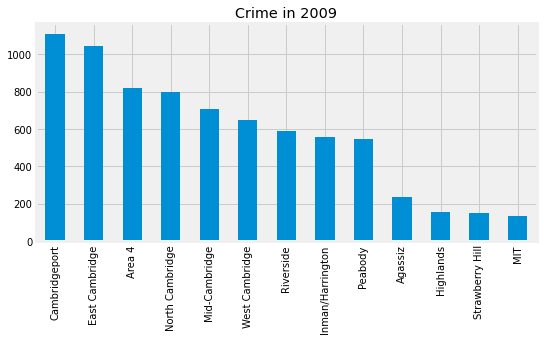

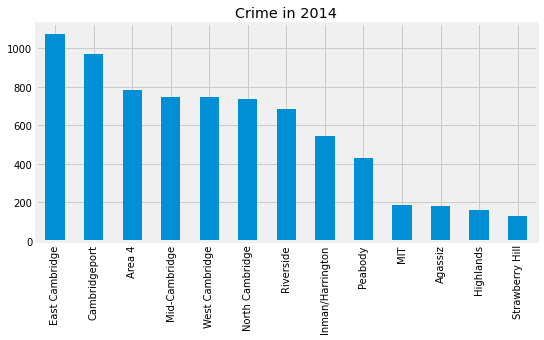

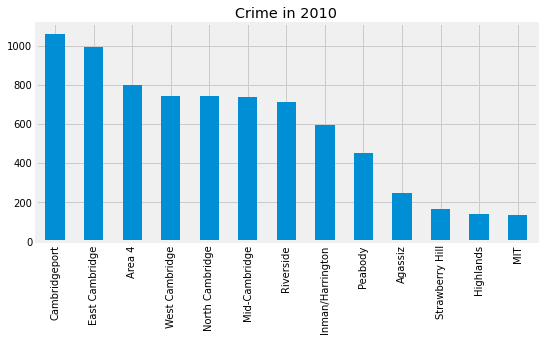

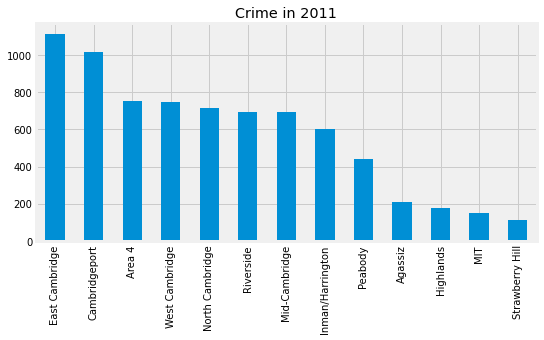

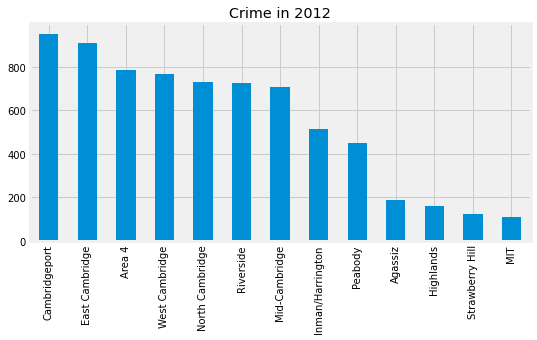

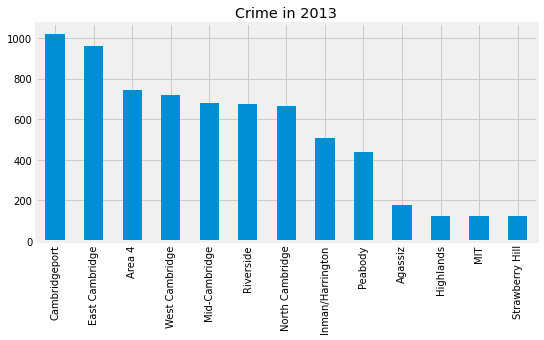

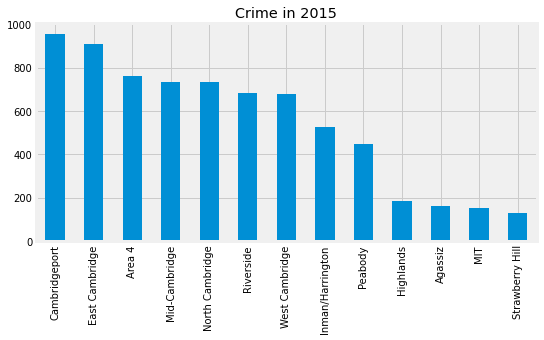

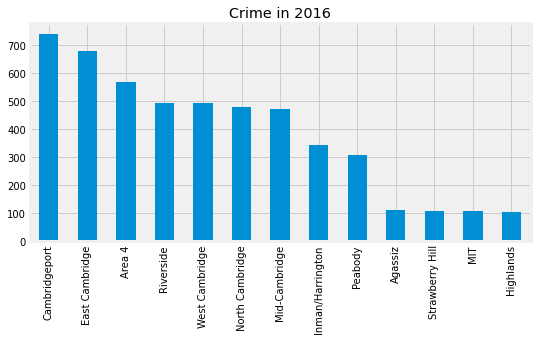

In [ ]:

for y in list_unique_year:
  plt.figure(figsize=(8,4))
  data['Neighborhood'].loc[data['Year']==y].value_counts().plot.bar()
  plt.title('Crime in '+ y)
  plt.show()

## **Crime Rate at Each Location**

In [ ]:
list_unique_location, list_number_location = create_list_number_crime('Location',data['Location'].unique())


In [ ]:
print("Total no . of unique locations: ", len(list_number_location))
total=len(list_number_location)
danger_zone=[]
num=[]
i=0
while i<total:
  if list_number_location[i] >50:
    danger_zone.append(list_unique_location[i])
    num.append(list_number_location[i])
  i=i+1

# print("Total no. dangerous locations where crime rate is more than 50: ", len(danger_zone))
# print("\n-----------------\n ", danger_zone)
list_of_tuples = list(zip(danger_zone, num))
zone = pd.DataFrame(list_of_tuples,
                  columns = ['Location', 'Rate'])
zone


Total no . of unique locations:  6225


,Location,Rate
0,"200 HAMPSHIRE STREET, Cambridge, MA",62
1,"100 SCIARAPPA STREET, Cambridge, MA",55
2,"1200 Massachusetts Avenue, Cambridge, MA",73
3,"600 Massachusetts Avenue, Cambridge, MA",396
4,"200 ALEWIFE BROOK PKY, Cambridge, MA",97
...,...,...
197,"0 CHURCH ST, Cambridge, MA",55
198,"MASSACHUSETTS AVE & WESTERN AVE, Cambridge, MA",62
199,"700 Mount Auburn St, Cambridge, MA",70
200,"200 HARVARD ST, Cambridge, MA",72


In [ ]:
!pip install geopandas
!pip install geopy

     |████████████████████████████████| 1.0 MB 29.7 MB/s 
     |████████████████████████████████| 6.3 MB 51.0 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
# ladd1 = "27488 Stanford Avenue, North Dakota"
# print("Location address:",ladd1)
# location = geolocator.geocode(ladd1)
# print("Latitude and Longitude of the said address:")
# print((location.latitude, location.longitude))
lat=[]
long=[]
locator = Nominatim(user_agent="myGeocoder")
for i in zone['Location']:
  location = locator.geocode(i)
  if(location):
    lat.append(location.latitude)
    long.append(location.longitude)
  else:
    lat.append(0.0)
    long.append(0.0)

zone['Latitude']=lat
zone['Longitude']=long


zone.head(5)

,Location,Rate,Latitude,Longitude
0,"200 HAMPSHIRE STREET, Cambridge, MA",62,42.373105,-71.100230
1,"100 SCIARAPPA STREET, Cambridge, MA",55,42.368970,-71.081854
2,"1200 Massachusetts Avenue, Cambridge, MA",73,42.398797,-71.132011
3,"600 Massachusetts Avenue, Cambridge, MA",396,42.364916,-71.103308
4,"200 ALEWIFE BROOK PKY, Cambridge, MA",97,42.389960,-71.142480


In [ ]:
zone.drop(zone.loc[zone['Latitude']==0.0].index, inplace=True)
zone.drop(zone.loc[zone['Longitude']==0.0].index, inplace=True)

BBox = (zone['Longitude'].min(),   zone['Longitude'].max(), zone['Latitude'].min(), zone['Latitude'].max())
print(BBox)

(-72.83174478366453, 0.13832209635091963, 42.3539526, 52.2065146)


In [ ]:
import geopandas
gdf = geopandas.GeoDataFrame(
zone, geometry=geopandas.points_from_xy(zone.Longitude, zone.Latitude))
zone

,Location,Rate,Latitude,Longitude,geometry
0,"200 HAMPSHIRE STREET, Cambridge, MA",62,42.373105,-71.100230,POINT (-71.10023 42.37311)
1,"100 SCIARAPPA STREET, Cambridge, MA",55,42.368970,-71.081854,POINT (-71.08185 42.36897)
2,"1200 Massachusetts Avenue, Cambridge, MA",73,42.398797,-71.132011,POINT (-71.13201 42.39880)
3,"600 Massachusetts Avenue, Cambridge, MA",396,42.364916,-71.103308,POINT (-71.10331 42.36492)
4,"200 ALEWIFE BROOK PKY, Cambridge, MA",97,42.389960,-71.142480,POINT (-71.14248 42.38996)
...,...,...,...,...,...
196,"200 CAMBRIDGE ST, Cambridge, MA",65,42.370801,-71.078800,POINT (-71.07880 42.37080)
197,"0 CHURCH ST, Cambridge, MA",55,42.374387,-71.120215,POINT (-71.12022 42.37439)
199,"700 Mount Auburn St, Cambridge, MA",70,42.372769,-71.155290,POINT (-71.15529 42.37277)
200,"200 HARVARD ST, Cambridge, MA",72,42.366999,-71.098046,POINT (-71.09805 42.36700)


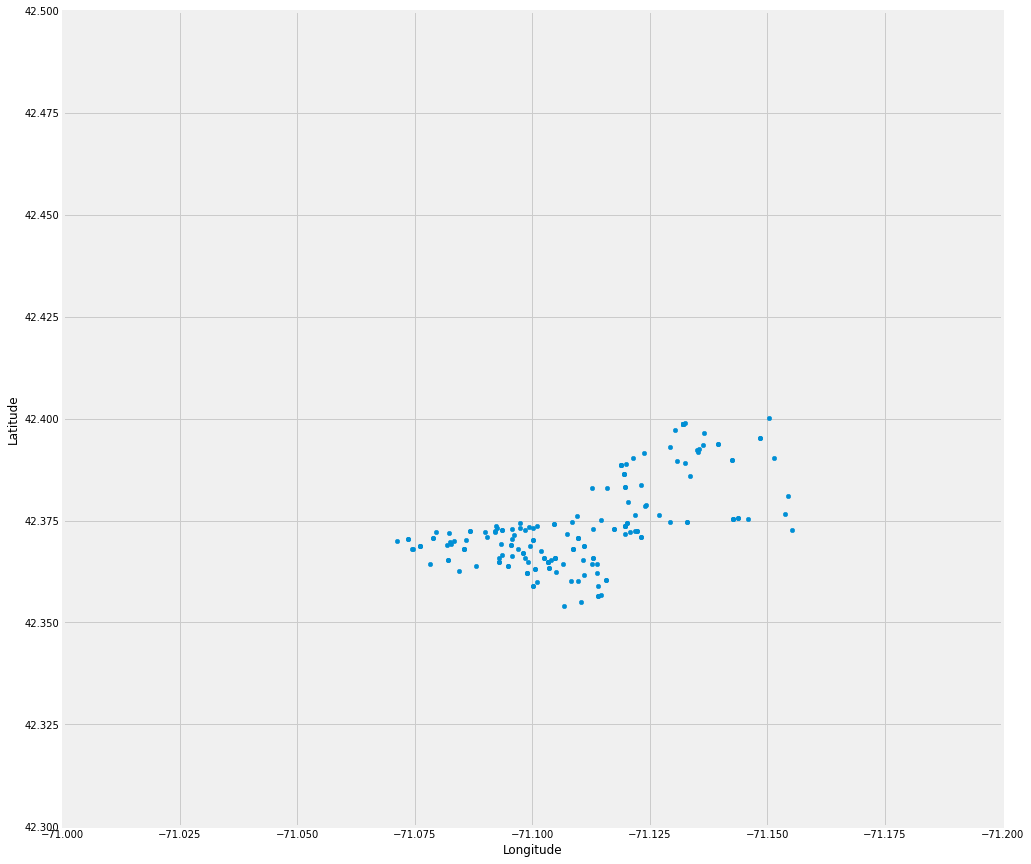

In [ ]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))

zone.plot(x='Longitude',y='Latitude',ax=ax, legend=True, kind="scatter")

plt.xlim(-71 ,-71.200)
plt.ylim( 42.3,42.5)
# show map
plt.show()

## Clustering Analysis

In [ ]:
X = data.drop(['Date of Report', 'Crime Date Time'], axis=1)
X.head()

,Crime,Reporting Area,Neighborhood,Location,Year
0,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",2009
1,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",2009
2,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",2009
3,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA",2009
4,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA",2009


## Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

This is really fun. First, I found out Inertia and no. of Clusters then I added arrows by taking the exact value where I found a significant change in inertia.

In [ ]:
# from sklearn.cluster import KMeans
!pip install kmodes
from kmodes.kmodes import KModes

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(X)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3158, cost: 217286.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9672, cost: 220743.0
Run 2, iteration: 2/100, moves: 10, cost: 220743.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 8403, cost: 224297.0
Run 3, iteration: 2/100, moves: 5621, cost: 224297.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 15597, cost: 216920.0
Run 4, iteration: 2/100, moves: 2189, cost: 216920.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 10871, cost: 218493.0
Run 5, iteration: 2/100, moves: 20, cost: 218493.0
Best run was number 4
[['Mal. Dest. Property' '102.0' 'East Cambridge'
  '100 CAMBRIDGESIDE PLACE, Cambridge, MA' '2015']
 ['

In [ ]:
#  Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:

# Building the model with 4 clusters
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X)
clusters


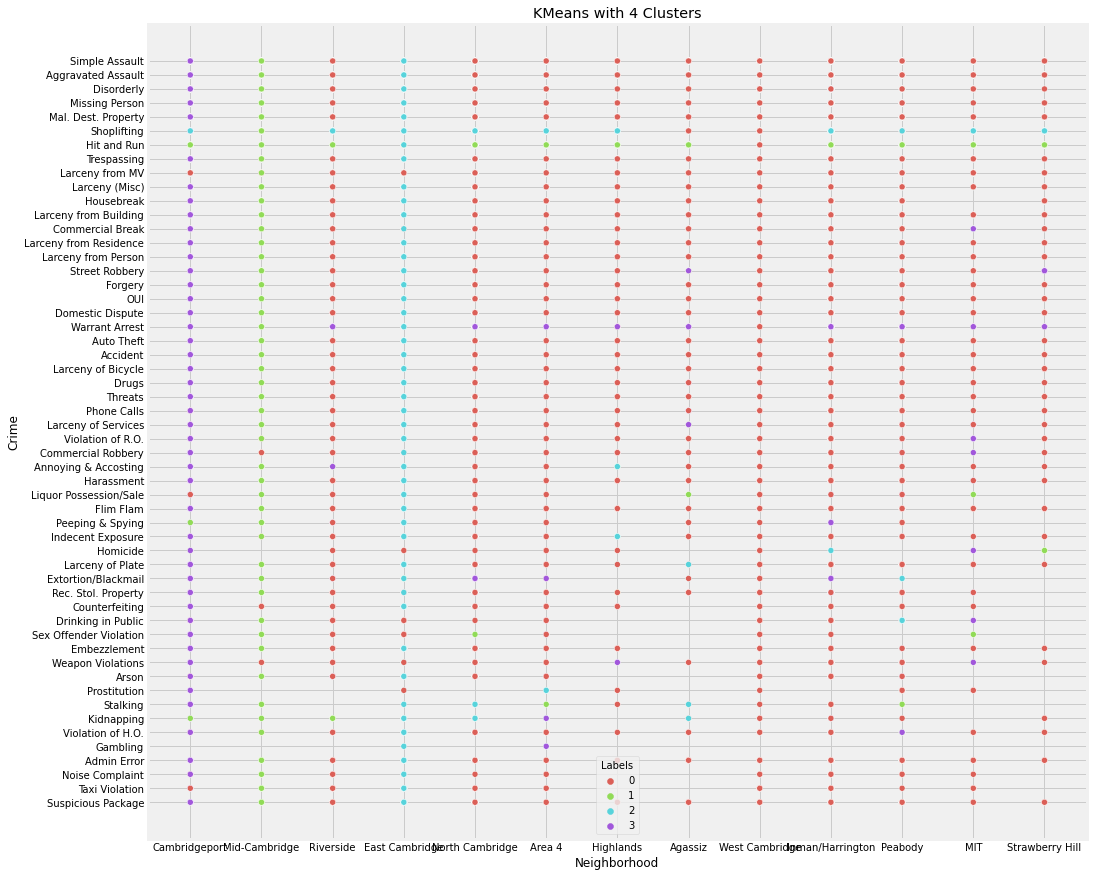

In [ ]:
X['Labels'] = kmode.labels_
plt.figure(figsize=(15, 15))
sns.scatterplot(X['Neighborhood'],X['Crime'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters')
plt.show()

In [ ]:
data.insert(0, "Cluster", clusters, True)
data

,Cluster,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location,Year
0,1,2009-01-01 00:39:00,2009-01-01 00:39:00,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA",2009
1,1,2009-01-01 01:34:00,2009-01-01 01:34:00,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA",2009
2,0,2009-01-01 01:43:00,2009-01-01 02:20:00,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...",2009
3,0,2009-01-01 02:27:00,2009-01-01 02:20:00,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA",2009
4,0,2009-01-01 02:34:00,2009-01-01 02:15:00,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA",2009
...,...,...,...,...,...,...,...,...
56009,1,2016-09-30 16:05:00,2016-09-28 17:00:00,Larceny from Residence,510.0,Cambridgeport,"0 FAIRMONT AVE, Cambridge, MA",2016
56010,0,2016-09-30 17:38:00,2016-09-30 16:30:00,Hit and Run,1105.0,North Cambridge,"2000 MASSACHUSETTS AVE, Cambridge, MA",2016
56011,0,2016-09-30 18:52:00,2016-09-16 18:52:00,Harassment,702.0,Riverside,"0 Soden St, Cambridge, MA",2016
56012,3,2016-09-30 19:52:00,2016-09-30 19:51:00,Hit and Run,1002.0,West Cambridge,"University Rd & Mount Auburn St, Cambridge, MA",2016


## **Conclusion**



> In order to have a broader view, I have performed EDA in depth and then convert the location into Latitude and Longitude to highlight what are the red alert areas.

For clustering categorical data I have implemented K-Modes Algorithm.
I have chosen neighborhood against crime to identify which areas have most types of crimes.

Through K-mode analysis, I found out that data can be divided into 4 clusters:
Label 0: where the different types of crimes happen in different areas of a city. However, West Cambridge and Riverside are the areas where these crimes happen.

* Label 1: Mid-Cambridge is also filled with different types of crimes.
* Label 2: East-Cambridge can also be categorize as a red alert zone where number of crimes happen.
* Label 3: Cambridge port has a highest number of crime rate and it is been categorize as a separate cluster.

Lastly, I have added clusters into dataframe, so that we can identify which cluster belong to which row.
